> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

 <a id='intro'></a>
## Introduction

### Dataset Description 

I chose the TMDB movie data set for my data analysis because I'm interested in movies. This data set contains information about 10,000 movies collected from the Movie Database (TMDb), including user reviews and revenue.

> **TMDB**
>
>* rows = 10866
>* columns = 21


### Question(s) for Analysis
<ol>
    <li>Which director produces most movies?</li>
    <li>Which actor has starred in the most movies?</li>
    <li>Which most genres are represented in the movies?</li>
    <li>What is the most popular genre from year to year?</li>
    <li>Does popularity have an impact on profit?</li>
    <li>Which films are the most profitable, which has the highest turnover rate and which is the most popular?</li>
</ol>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

#### 1) Remove duplicate rows from the data set

In [6]:
# Check of duplicated
print(df.duplicated().sum())

1


In [7]:
# Which data set is duplicate
df[df.duplicated()].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
# visual check: whether different data is included
df[df['id'] == 42194].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
# Data is the same, delete a record
df.drop_duplicates(inplace=True)

In [10]:
# Verifying implementation
print(df.duplicated().sum())

0


#### 2) Change the date/time format

In [11]:
# Change from string format to datetime format
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

#### 3) Remove unnecessary columns

In [12]:
# Delete unnecessary columns based on the questions
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'budget_adj', 'revenue_adj' ], axis=1, inplace=True)

In [13]:
# Verifying implementation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   budget          10865 non-null  int64         
 3   revenue         10865 non-null  int64         
 4   original_title  10865 non-null  object        
 5   cast            10789 non-null  object        
 6   director        10821 non-null  object        
 7   genres          10842 non-null  object        
 8   release_date    10865 non-null  datetime64[ns]
 9   vote_count      10865 non-null  int64         
 10  vote_average    10865 non-null  float64       
 11  release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.1+ MB


#### 4) Save this data in a new file

In [14]:
# save the new data frame in "tmdb_clean.csv"
df.to_csv('tmdb_clean.csv', index=False, encoding = 'utf-8')

In [15]:
# Check after saving, loading the file
df = pd.read_csv('tmdb_clean.csv')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Question 1: Which director produces most movies?

In [16]:
# The 10 director with the most movies 
df['director'].value_counts().head(n=10)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: director, dtype: int64

### Answer 1: Woody Allen produces most movies

### <hr>

### Question 2:  Which actor has starred in the most movies?

In [17]:
# Actors are included in the “cast” column
df['cast'].value_counts().head(n=10)

Louis C.K.                                                                          6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei             5
Bill Burr                                                                           4
George Carlin                                                                       3
Pierre Coffin                                                                       3
Jim Jefferies                                                                       3
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    3
Chris Wedge                                                                         3
Zac Efron|Vanessa Hudgens|Ashley Tisdale|Lucas Grabeel|Corbin Bleu                  3
Aziz Ansari                                                                         3
Name: cast, dtype: int64

In [18]:
# function to split the string and return the count of each data set.
def split(x):
    # Concatenate all rows of the data set
    split_plot = df[x].str.cat(sep = '|')
    split = pd.Series(split_plot.split('|'))
    # Count every data set and return.
    info = split.value_counts(ascending=False)
    return info

In [19]:
# Call the function "Split" to display the actor
df_actor = split('cast')
print(df_actor)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
                     ..
Asen Asenov           1
Joe Quesada           1
Andy Milonakis        1
Samantha Cope         1
Stephanie Nielson     1
Length: 19026, dtype: int64


#### Answer 2 is presented in a graphical form

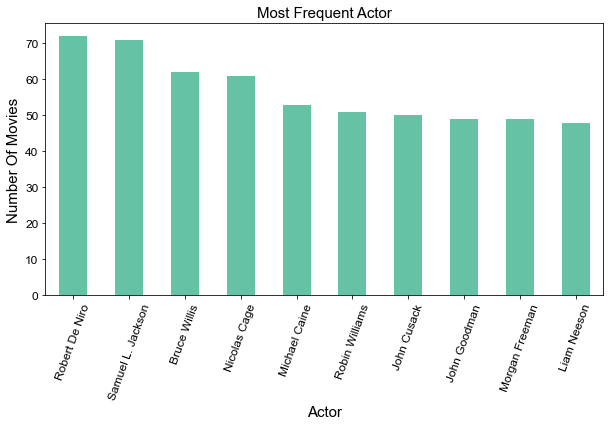

In [20]:
#plot the bar plot.
df_actor.iloc[:10].plot.bar(figsize=(10,5),colormap= 'Set2',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=15)
plt.ylabel("Number Of Movies",fontsize= 15)
sns.set_style("white")

### Answer 2: Robert De Niro has starred in the most movies, but Samuel L. Jackson is right behind him.

### <hr>

### Question 3: Which most genres are represented in the movies?

In [21]:
# Call the function "Split" to display the genres
df_genres = split('genres')
print(df_genres)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64


### Answer 3 is presented in a graphical form

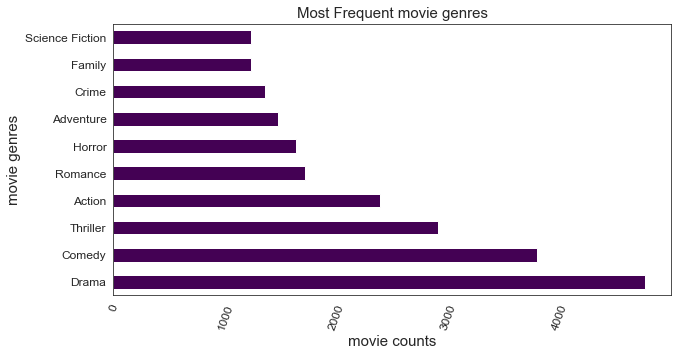

In [22]:
#plot the bar plot.
df_genres.iloc[:10].plot.barh(figsize=(10,5),colormap= 'viridis',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent movie genres",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('movie counts',fontsize=15)
plt.ylabel("movie genres",fontsize= 15)
sns.set_style("white")

### Answer 3: Drama is the most genres are represented in the movies

### <hr>

### Question 4: What is the most popular genre from year to year?

In [23]:
# copy a new dataframe 
df_g = df.copy()
#convert genres datatype to string
df_g.genres = df_g.genres.astype('str')

In [24]:
# split the genres string
df_g.genres = df_g.genres.str.split('|')

In [25]:
# Verifying implementation
df_g.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,2015


In [26]:
# creategenre list( create each row for each gen) using explode 
df_g = df_g.explode('genres')

In [27]:
# Verifying implementation
df_g.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,2015-06-09,5562,6.5,2015


In [28]:
# groupby year again and get the largest value
df_g.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1)

release_year  release_year  genres         
1960          1960          Thriller           0.811910
1961          1961          Animation          2.631987
1962          1962          Adventure          0.942513
1963          1963          Animation          2.180410
1964          1964          War                0.930959
1965          1965          Music              0.968850
1966          1966          Animation          0.585717
1967          1967          Animation          1.348805
1968          1968          Mystery            1.519456
1969          1969          Crime              0.948020
1970          1970          Animation          1.127719
1971          1971          Family             1.530722
1972          1972          Crime              1.072768
1973          1973          Animation          0.956526
1974          1974          Mystery            0.702035
1975          1975          Adventure          0.880297
1976          1976          Crime              0.707249
1977

In [29]:
# tidy up the data by removing extra row index by reset index
df_g = df_g.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)

In [30]:
# Verifying implementation
df_g.head()

release_year  genres   
1960          Thriller     0.811910
1961          Animation    2.631987
1962          Adventure    0.942513
1963          Animation    2.180410
1964          War          0.930959
Name: popularity, dtype: float64

In [31]:
# change the pandas series to pandas dataframe
df_g = df_g.reset_index()

In [32]:
# Verifying implementation
df_g.head()

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959


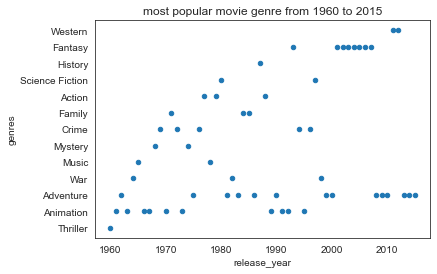

In [33]:
# Create a chart
df_g.plot(x='release_year', y='genres', kind='scatter', title = 'most popular movie genre from 1960 to 2015');

### Answer 4: 
* It is a trend for the last 20 years to see that the most profitable genres are “fantasy” and “adventure.” 
* In previous years before 2000, the spectrum was even wider. 
* If I were a director I would probably make a movie that includes these two genres

### <hr>

### Question 5: Does popularity have an impact on profit?

In [34]:
# Caldulation: profit value
df['profit'] = df['revenue'] - df['budget']

0.6289972839642584


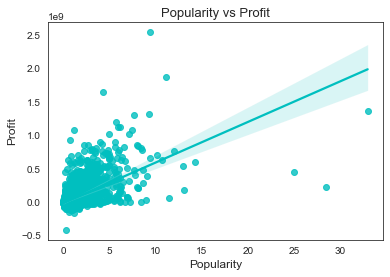

In [35]:
# create a Regression Plot
ax = sns.regplot(x=df['popularity'],y=df['profit'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#find the correlation between them.
data_corr = df.corr()

print(data_corr.loc['popularity','profit'])

##### Answer 5: 
>* The presentation shows us that popularity and profit correlate positively (0.61).
>* This means that movies that are highly popular tend to generate high profits.
>* But in addition to profit, I also wanted to look at the return on sales (ROI).

### <hr>

### Question 6: Which films are the most profitable, which has the highest Return of Investment (ROI) and which is the most popular?

In [36]:
# Caldulation: Return of Sales (ROI)
df['ROI'] = df['profit'] / df['budget']

In [37]:
# Create the required data set
df_m = df.groupby(['original_title', 'popularity','release_year', 'revenue','budget','profit'])['ROI'].sum()

# top 10 movies with most profitable
df_m = df_m.reset_index().sort_values(by='profit', ascending=False)[:10]
df_m [:10]

,original_title,popularity,release_year,revenue,budget,profit,ROI
836,Avatar,9.432768,2009,2781505847,237000000,2544505847,10.736312
7571,Star Wars: The Force Awakens,11.173104,2015,2068178225,200000000,1868178225,9.340891
9995,Titanic,4.355219,1997,1845034188,200000000,1645034188,8.225171
4553,Jurassic World,32.985763,2015,1513528810,150000000,1363528810,9.090192
3301,Furious 7,9.335014,2015,1506249360,190000000,1316249360,6.927628
8058,The Avengers,7.637767,2012,1519557910,220000000,1299557910,5.907081
3701,Harry Potter and the Deathly Hallows: Part 2,5.711315,2011,1327817822,125000000,1202817822,9.622543
838,Avengers: Age of Ultron,5.944927,2015,1405035767,280000000,1125035767,4.017985
3282,Frozen,6.112766,2013,1274219009,150000000,1124219009,7.494793
9192,The Net,1.136610,1995,1106279658,22000000,1084279658,49.285439


### Answer 6.1: Avatar is the most profitable movie, but does not have the highest ROI.

In [38]:
# top 10 movies with highest ROI
df_m_R = df_m.sort_values(by='ROI', ascending=False)
df_m_R [:10]

,original_title,popularity,release_year,revenue,budget,profit,ROI
9192,The Net,1.136610,1995,1106279658,22000000,1084279658,49.285439
836,Avatar,9.432768,2009,2781505847,237000000,2544505847,10.736312
3701,Harry Potter and the Deathly Hallows: Part 2,5.711315,2011,1327817822,125000000,1202817822,9.622543
7571,Star Wars: The Force Awakens,11.173104,2015,2068178225,200000000,1868178225,9.340891
4553,Jurassic World,32.985763,2015,1513528810,150000000,1363528810,9.090192
9995,Titanic,4.355219,1997,1845034188,200000000,1645034188,8.225171
3282,Frozen,6.112766,2013,1274219009,150000000,1124219009,7.494793
3301,Furious 7,9.335014,2015,1506249360,190000000,1316249360,6.927628
8058,The Avengers,7.637767,2012,1519557910,220000000,1299557910,5.907081
838,Avengers: Age of Ultron,5.944927,2015,1405035767,280000000,1125035767,4.017985


### Answer 6.2: "The Net" has the highest ROI, although this is very low in popularity

In [39]:
# top 10 movies with highest popularity
df_m_P = df_m.sort_values(by='popularity', ascending=False)
df_m_P [:10]

,original_title,popularity,release_year,revenue,budget,profit,ROI
4553,Jurassic World,32.985763,2015,1513528810,150000000,1363528810,9.090192
7571,Star Wars: The Force Awakens,11.173104,2015,2068178225,200000000,1868178225,9.340891
836,Avatar,9.432768,2009,2781505847,237000000,2544505847,10.736312
3301,Furious 7,9.335014,2015,1506249360,190000000,1316249360,6.927628
8058,The Avengers,7.637767,2012,1519557910,220000000,1299557910,5.907081
3282,Frozen,6.112766,2013,1274219009,150000000,1124219009,7.494793
838,Avengers: Age of Ultron,5.944927,2015,1405035767,280000000,1125035767,4.017985
3701,Harry Potter and the Deathly Hallows: Part 2,5.711315,2011,1327817822,125000000,1202817822,9.622543
9995,Titanic,4.355219,1997,1845034188,200000000,1645034188,8.225171
9192,The Net,1.136610,1995,1106279658,22000000,1084279658,49.285439


### Answer 6.3: "Jurassic World" Is the most popular movie

<a id='conclusions'></a>
## Conclusions

> There are 20 unique movie genres, but drama is the genre that is showing an increasing trend in recent years. 
It also shows that more “fantasy” and “adventure” films have been made in recent years.

> This data set is very rich in information. 
However, some data sets have zero values, which I would also like to have used for further analysis, e.g. keywords. 
This is because zero values would lead to incorrect results in the correlation diagrams and the calculation. Therefore, data cleansing is a necessary part before starting to examine the data set. 
>Furthermore, it was also difficult to have double values in the actors or genres columns

> I've seen that there is a positive correlation between profitability and popularity. However, I was surprised that the movie with the highest ROI was one of the less popular films.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])